# Iris (붓꽃) 품종 분류 (기본 신경망)

이 노트북은 Scikit-learn의 Iris 데이터셋을 사용하여 붓꽃의 품종을 분류하는 간단한 심층 신경망(DNN)을 구축, 훈련, 평가합니다.

**프로세스:**
1. **데이터 로딩 및 분할**: Iris 데이터셋을 로드하고 훈련 세트와 테스트 세트로 분할합니다.
2. **데이터 전처리**: 특성(Feature)은 `StandardScaler`를 사용하여 스케일링하고, 레이블(Label)은 `to_categorical`을 사용하여 원-핫 인코딩합니다.
3. **모델 구축**: `Dense` 레이어로 구성된 순차 모델을 정의합니다.
4. **훈련 및 검증**: 모델을 학습시키고, 매 에포크마다 검증 세트로 성능을 모니터링합니다.
5. **결과 시각화**: 훈련 과정의 정확도와 손실을 그래프로 시각화하여 과적합 여부를 확인합니다.
6. **최종 평가**: 학습된 모델을 테스트 데이터셋으로 최종 평가합니다.

## 1. 라이브러리 임포트

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# 재현성을 위한 랜덤 시드 설정
tf.random.set_seed(1)

## 2. 데이터 로딩 및 분할

In [2]:
iris = load_iris()
X = iris['data']
y = iris["target"]

# 훈련 데이터와 테스트 데이터를 7:3 비율로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

print(f"훈련 데이터 형태: {X_train.shape}")
print(f"테스트 데이터 형태: {X_test.shape}")

훈련 데이터 형태: (105, 4)
테스트 데이터 형태: (45, 4)


## 3. 데이터 전처리

In [3]:
# 특성 스케일링 (평균 0, 분산 1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # 테스트 데이터는 훈련 데이터의 스케일러로 변환

# 레이블 원-핫 인코딩 (e.g., 2 -> [0, 0, 1])
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

print("스케일링된 첫 번째 훈련 데이터:\
", X_train_scaled[0])
print("원-핫 인코딩된 첫 번째 훈련 레이블:", y_train_one_hot[0])

스케일링된 첫 번째 훈련 데이터: [ 2.26050169 -1.05089682  1.77622921  1.42370971]
원-핫 인코딩된 첫 번째 훈련 레이블: [0. 0. 1.]


## 4. 모델 구축 및 컴파일

In [4]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax') # 3개의 클래스에 대한 확률을 출력
])

# 모델 컴파일
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', # 다중 클래스 분류를 위한 손실 함수
              metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 13187 (51.51 KB)
Trainable params: 13187 (51.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 5. 모델 학습

In [5]:
history = model.fit(X_train_scaled, y_train_one_hot,
                    epochs=50, # 에포크 50으로 증가
                    batch_size=16, # 배치 사이즈 조정
                    validation_data=(X_test_scaled, y_test_one_hot), # 검증 데이터 추가
                    verbose=1)

Epoch 1/50


7/7 [==============================] - 1s 31ms/step - loss: 0.9150 - accuracy: 0.6381 - val_loss: 0.7756 - val_accuracy: 0.7333
Epoch 2/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6451 - accuracy: 0.8571 - val_loss: 0.6085 - val_accuracy: 0.7333
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 0.4856 - accuracy: 0.8667 - val_loss: 0.5275 - val_accuracy: 0.7333
Epoch 4/50
7/7 [==============================] - 0s 6ms/step - loss: 0.3907 - accuracy: 0.8571 - val_loss: 0.4459 - val_accuracy: 0.7556
Epoch 5/50
7/7 [==============================] - 0s 6ms/step - loss: 0.3291 - accuracy: 0.8857 - val_loss: 0.4117 - val_accuracy: 0.7778
Epoch 6/50
7/7 [==============================] - 0s 6ms/step - loss: 0.2813 - accuracy: 0.8952 - val_loss: 0.3733 - val_accuracy: 0.8222
Epoch 7/50
7/7 [==============================] - 0s 7ms/step - loss: 0.2559 - accuracy: 0.8952 - val_loss: 0.3445 - val_accuracy: 0.8000
Epoch 8/50
7/7 [===============

## 6. 학습 결과 시각화

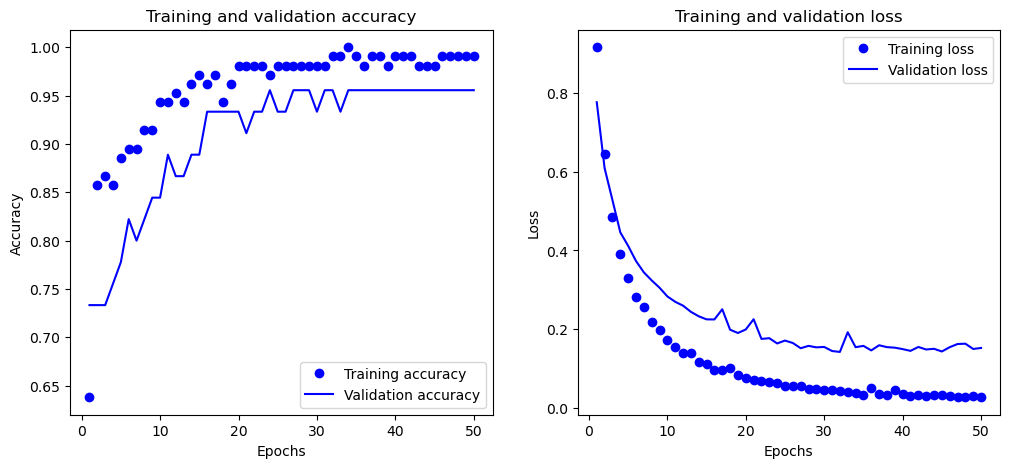

In [6]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 5))

# 정확도 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 손실 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 7. 모델 평가

In [7]:
print("--- 테스트 데이터셋 최종 평가 ---")
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_one_hot)
print(f"테스트 손실: {test_loss:.4f}")
print(f"테스트 정확도: {test_acc:.4f}")

--- 테스트 데이터셋 최종 평가 ---
2/2 [==============================] - 0s 0s/step - loss: 0.1529 - accuracy: 0.9556
테스트 손실: 0.1529
테스트 정확도: 0.9556
